D:\OneDrive - Cardiff University\05 - Python\13 - ABM
D:
OneDrive - Cardiff University
05 - Python
13 - ABM
D:\


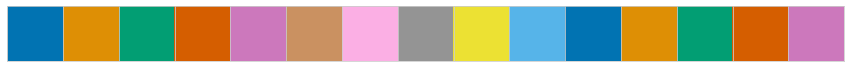

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl
import seaborn as sns
import sys

# blues = [x for x in reversed(sns.color_palette("Blues_d", 11))]
# sns.set_palette(sns.color_palette("Paired", 10))
# sns.set_style("white")
sns.set_palette(sns.color_palette("colorblind", 15))
plt.rcParams['font.family'] = 'Times New Roman'
font_size = 12
params = {'axes.labelsize': font_size+2,
          'axes.titlesize':font_size+4,
          'legend.fontsize': font_size, 
          'xtick.labelsize': font_size,
          'ytick.labelsize': font_size,
          'font.size': font_size}
plt.rcParams.update(params)
sns.set_style("whitegrid")
fig_format = "png"
dpi = 1000
figsize = (12, 3.5)
figsize_map = (10, 6)
sns.palplot(sns.color_palette())

print(os.getcwd())
computer_path= ""
for x in os.getcwd().split(os.path.sep):
    print(x)
    computer_path=computer_path+x+os.path.sep
    if x == "sceac10":
        break    
    else: computer_path = os.getcwd().split(os.path.sep)[0]+os.path.sep
print(computer_path)

## Annual heat demand of dwellings

In [88]:
path_data = r'D:\Cardiff University\National Grid Project - General\Paper\data for UKERC'
file = "Annual_heat_demand_LSOA.csv"

df_annual_heat = pd.read_csv(path_data+os.path.sep+file, index_col=0)

In [15]:
list_LA_South_Wales = ["Ceredigion",
                    "Bridgend",
                    "Neath Port Talbot",
                    "Powys",
                    "Rhondda Cynon Taf",
                    "Monmouthshire",
                    "Swansea",
                    "Torfaen",
                    "Blaenau Gwent",
                    "Caerphilly",
                    "Cardiff",
                    "Merthyr Tydfil",
                    "The Vale of Glamorgan",
                    "Carmarthenshire",
                    "Pembrokeshire",
                    "Newport",
]

for la in list_LA_South_Wales:
    if la in df_annual_heat['Local Authority (2011)'].unique():
        print(la, " recognized")
    else:
        print(la, " not recognized")

Ceredigion  recognized
Bridgend  recognized
Neath Port Talbot  recognized
Powys  recognized
Rhondda Cynon Taf  recognized
Monmouthshire  recognized
Swansea  recognized
Torfaen  recognized
Blaenau Gwent  recognized
Caerphilly  recognized
Cardiff  recognized
Merthyr Tydfil  recognized
The Vale of Glamorgan  recognized
Carmarthenshire  recognized
Pembrokeshire  recognized
Newport  recognized


In [108]:
tempDF = df_annual_heat[['Local Authority (2011)', 'Local Authority (2019)']].copy()
tempDF.drop_duplicates(inplace=True)
tempDF.reset_index(inplace=True, drop=True)
zip_iterator = zip(tempDF["Local Authority (2011)"], tempDF["Local Authority (2019)"])
LA_lookup_table = dict(zip_iterator)
LA_lookup_table 

{'City of London': 'City of London',
 'Barking and Dagenham': 'Barking and Dagenham',
 'Barnet': 'Barnet',
 'Bexley': 'Bexley',
 'Brent': 'Brent',
 'Bromley': 'Bromley',
 'Camden': 'Camden',
 'Croydon': 'Croydon',
 'Ealing': 'Ealing',
 'Enfield': 'Enfield',
 'Greenwich': 'Greenwich',
 'Hackney': 'Hackney',
 'Hammersmith and Fulham': 'Hammersmith and Fulham',
 'Haringey': 'Haringey',
 'Harrow': 'Harrow',
 'Havering': 'Havering',
 'Hillingdon': 'Hillingdon',
 'Hounslow': 'Hounslow',
 'Islington': 'Islington',
 'Kensington and Chelsea': 'Kensington and Chelsea',
 'Kingston upon Thames': 'Kingston upon Thames',
 'Lambeth': 'Lambeth',
 'Lewisham': 'Lewisham',
 'Merton': 'Merton',
 'Newham': 'Newham',
 'Redbridge': 'Redbridge',
 'Richmond upon Thames': 'Richmond upon Thames',
 'Southwark': 'Southwark',
 'Sutton': 'Sutton',
 'Tower Hamlets': 'Tower Hamlets',
 'Waltham Forest': 'Waltham Forest',
 'Wandsworth': 'Wandsworth',
 'Westminster': 'Westminster',
 'Bolton': 'Bolton',
 'Bury': 'Bury',
 

In [18]:
df_annual_heat = df_annual_heat.loc[df_annual_heat['Local Authority (2011)'].isin(list_LA_South_Wales), :]

In [20]:
df_annual_heat.columns

Index(['Area (km2)',
       'Average heat demand after energy efficiency measures for detached biomass boiler (kWh)',
       'Average heat demand after energy efficiency measures for detached gas boiler (kWh)',
       'Average heat demand after energy efficiency measures for detached oil boiler (kWh)',
       'Average heat demand after energy efficiency measures for detached resistance heating (kWh)',
       'Average heat demand after energy efficiency measures for flat biomass boiler (kWh)',
       'Average heat demand after energy efficiency measures for flat gas boiler (kWh)',
       'Average heat demand after energy efficiency measures for flat oil boiler (kWh)',
       'Average heat demand after energy efficiency measures for flat resistance heating (kWh)',
       'Average heat demand after energy efficiency measures for semi-detached biomass boiler (kWh)',
       'Average heat demand after energy efficiency measures for semi-detached gas boiler (kWh)',
       'Average heat demand

In [21]:
dwelling_types = ["detached", "semi-detached", "flat", "terraced"]
heating_systems = ["gas boiler", "oil boiler", "biomass boiler", "resistance heating"]
list_dwelling_categories = []
for d in dwelling_types:
    for h in heating_systems:
        list_dwelling_categories.append(d+" "+h)

list_dwelling_categories

['detached gas boiler',
 'detached oil boiler',
 'detached biomass boiler',
 'detached resistance heating',
 'semi-detached gas boiler',
 'semi-detached oil boiler',
 'semi-detached biomass boiler',
 'semi-detached resistance heating',
 'flat gas boiler',
 'flat oil boiler',
 'flat biomass boiler',
 'flat resistance heating',
 'terraced gas boiler',
 'terraced oil boiler',
 'terraced biomass boiler',
 'terraced resistance heating']

In [33]:
new_header_1 = []
new_header_2 = []
for col in df_annual_heat.columns:
    tempHeader1 = ""
    tempHeader2 = col
    for dc in list_dwelling_categories:
        if dc in col:
            tempHeader1 = dc 
            tempHeader2 = col.replace(dc, "").replace(" for ", "").replace(" of ", "")
    
    new_header_1.append(tempHeader1)
    new_header_2.append(tempHeader2)

In [40]:
tuples = list(zip(*[new_header_1,new_header_2]))
tuples
columns = pd.MultiIndex.from_tuples(tuples, names=["Dwelling categories", "Parameters"])

df_annual_heat.columns = columns


In [68]:
final_df = df_annual_heat.stack(0)

to_drop = ['Area (km2)',
           'Local Authority (2011)',
           'Local Authority (2019)',
           'Road length (m)', 
           'Rurality',
           'Total heat demand after energy efficiency measures 2018 (kWh)',
           'Total heat demand before energy efficiency measures 2018 (kWh)']


final_df = final_df.drop(to_drop, axis=1).dropna().groupby(level=[1]).agg({'Average heat demand after energy efficiency measures (kWh)':'mean',
                                                               'Average heat demand before energy efficiency measures (kWh)':'mean',
                                                               'Number in 2018': 'sum'})                                                            

Text(0.5, 0, '')

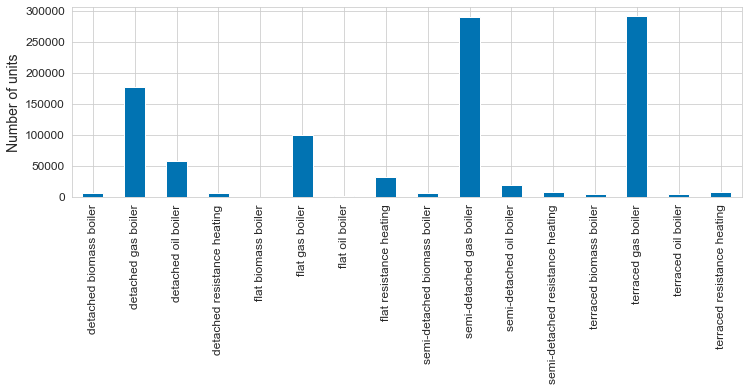

In [84]:
f, ax = plt.subplots(figsize=figsize)
final_df["Number in 2018"].plot.bar(ax=ax)
ax.set_ylabel("Number of units")
ax.set_xlabel("")

Text(0.5, 0, '')

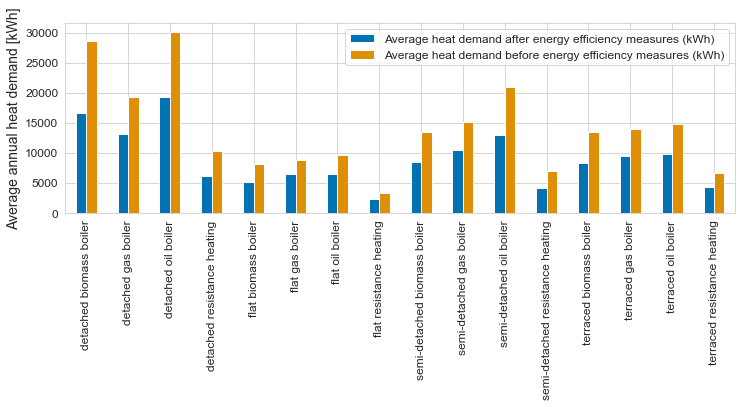

In [85]:
f, ax = plt.subplots(figsize=figsize)
final_df[["Average heat demand after energy efficiency measures (kWh)", "Average heat demand before energy efficiency measures (kWh)"]].plot.bar(ax=ax)
ax.set_ylabel("Average annual heat demand [kWh]")
ax.set_xlabel("")

## EPC rating of dwellings

In [138]:
path = r"D:\OneDrive - Cardiff University\04 - Projects\03 - PhD\03 - Analysis\03 - LSOAs\00 - Data\Domestic_EPC_results"
file = "EPC_ratings_by_LA_england_wales.csv"

In [143]:
df_epc_rating = pd.read_csv(path+os.path.sep+file)

In [144]:
df_epc_rating = df_epc_rating.loc[df_epc_rating["Local Authority"].isin(list_LA_South_Wales ), :].groupby("Key").mean()
df_epc_rating.index = [c.lower().replace("solid fuel", "biomass") for c in df_epc_rating.index]

Text(0.5, 0, '')

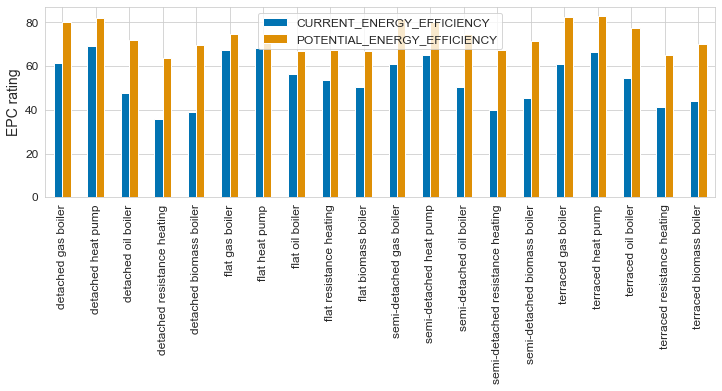

In [145]:
f, ax = plt.subplots(figsize=figsize)
df_epc_rating.plot.bar(ax=ax)
ax.set_ylabel("EPC rating")
ax.set_xlabel("")

## Costs of energy efficiency improvements

In [129]:
path_data = r'D:\Cardiff University\National Grid Project - General\Paper\data for UKERC'
file = "Energy_efficiency_improvements_costs_LA.csv"

df_costs_EE = pd.read_csv(path_data+os.path.sep+file)
df_costs_EE["Local Authority (2011)"] = df_costs_EE["Local Authority (2019)"].replace(LA_lookup_table)
df_costs_EE = df_costs_EE.loc[df_costs_EE["Local Authority (2011)"].isin(list_LA_South_Wales), :]

In [130]:
new_header_1 = []
new_header_2 = []
for col in df_costs_EE.columns:
    tempHeader1 = ""
    tempHeader2 = col
    for dc in list_dwelling_categories:
        if dc in col:
            tempHeader1 = dc 
            tempHeader2 = col.replace(dc, "").replace(" for ", "").replace(" of ", "")
    
    new_header_1.append(tempHeader1)
    new_header_2.append(tempHeader2)

In [131]:
tuples = list(zip(*[new_header_1,new_header_2]))
tuples
columns = pd.MultiIndex.from_tuples(tuples, names=["Dwelling categories", "Parameters"])
df_costs_EE.columns = columns

In [132]:
df_costs_EE = df_costs_EE.stack(0)
to_drop = ['Local Authority (2011)', 'Local Authority (2019)', 'Number in 2018', 'Total energy efficiency improvements costs (GBP)']
df_costs_EE = df_costs_EE.drop(to_drop, axis=1).dropna().groupby(level=[1]).mean()

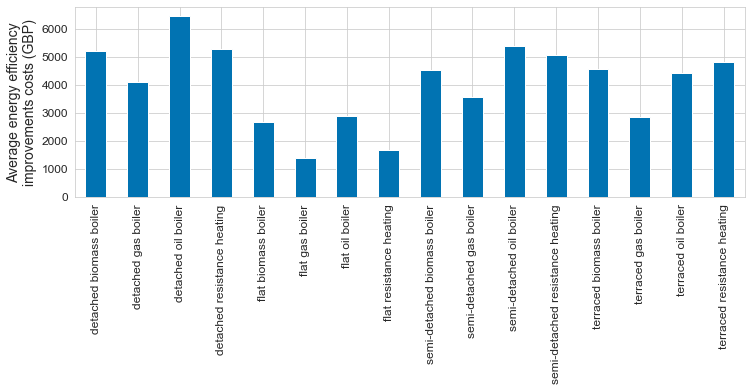

In [136]:
f, ax = plt.subplots(figsize=figsize)
df_costs_EE.plot.bar(ax=ax)
ax.set_ylabel("Average energy efficiency\nimprovements costs (GBP)")
ax.set_xlabel("")
ax.legend().remove()

## Combine datasets

In [218]:
south_wales_df = pd.merge(df_costs_EE, df_epc_rating, left_index=True, right_index=True, how="left")
south_wales_df

,Average energy efficiency improvements costs (GBP),CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY
Dwelling categories,,,
detached biomass boiler,5212.148668,38.969067,69.707341
detached gas boiler,4120.438884,61.477651,80.058426
detached oil boiler,6458.397320,47.933020,71.754643
detached resistance heating,5295.947275,35.708868,63.611129
flat biomass boiler,2668.248595,50.369110,66.978648
flat gas boiler,1388.635929,67.464434,74.602609
flat oil boiler,2898.540260,56.612375,66.848844
flat resistance heating,1700.355115,53.521341,67.427356
semi-detached biomass boiler,4551.177007,45.433534,71.634337


In [219]:
south_wales_df = pd.merge(south_wales_df, final_df, left_index=True, right_index=True, how="left")
south_wales_df

,Average energy efficiency improvements costs (GBP),CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY,Average heat demand after energy efficiency measures (kWh),Average heat demand before energy efficiency measures (kWh),Number in 2018
Dwelling categories,,,,,,
detached biomass boiler,5212.148668,38.969067,69.707341,16647.854919,28567.032432,6850.0
detached gas boiler,4120.438884,61.477651,80.058426,13227.565338,19258.444465,177827.0
detached oil boiler,6458.397320,47.933020,71.754643,19252.489692,30070.510130,57768.0
detached resistance heating,5295.947275,35.708868,63.611129,6109.971903,10276.986334,7113.0
flat biomass boiler,2668.248595,50.369110,66.978648,5252.206796,8181.402152,713.0
flat gas boiler,1388.635929,67.464434,74.602609,6583.521715,8771.909871,99924.0
flat oil boiler,2898.540260,56.612375,66.848844,6576.939004,9726.123245,1986.0
flat resistance heating,1700.355115,53.521341,67.427356,2366.617958,3450.513923,33092.0
semi-detached biomass boiler,4551.177007,45.433534,71.634337,8499.091151,13475.970476,7364.0


In [220]:
dwelling_values = []
heating_values = []
for c in south_wales_df.index:
    tempHeating = ""
    for h in heating_systems:
        if h in c:
            tempHeating = h
    dwelling_values.append(c.replace(" "+tempHeating, ""))
    heating_values.append(tempHeating.capitalize())   
print(dwelling_values)
print(heating_values)

['detached', 'detached', 'detached', 'detached', 'flat', 'flat', 'flat', 'flat', 'semi-detached', 'semi-detached', 'semi-detached', 'semi-detached', 'terraced', 'terraced', 'terraced', 'terraced']
['Biomass boiler', 'Gas boiler', 'Oil boiler', 'Resistance heating', 'Biomass boiler', 'Gas boiler', 'Oil boiler', 'Resistance heating', 'Biomass boiler', 'Gas boiler', 'Oil boiler', 'Resistance heating', 'Biomass boiler', 'Gas boiler', 'Oil boiler', 'Resistance heating']


In [221]:
dwelling_values =[c.capitalize() +" house" if "flat" not in c else c.capitalize() for c in dwelling_values]
dwelling_values


['Detached house',
 'Detached house',
 'Detached house',
 'Detached house',
 'Flat',
 'Flat',
 'Flat',
 'Flat',
 'Semi-detached house',
 'Semi-detached house',
 'Semi-detached house',
 'Semi-detached house',
 'Terraced house',
 'Terraced house',
 'Terraced house',
 'Terraced house']

In [222]:
south_wales_df["DwellingType"]=dwelling_values
south_wales_df["HeatingSystem"]=heating_values

In [223]:
rename_cols ={'Number in 2018':"NumberOfUnits"}
south_wales_df.rename(columns=rename_cols, inplace=True)
south_wales_df

,Average energy efficiency improvements costs (GBP),CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY,Average heat demand after energy efficiency measures (kWh),Average heat demand before energy efficiency measures (kWh),NumberOfUnits,DwellingType,HeatingSystem
Dwelling categories,,,,,,,,
detached biomass boiler,5212.148668,38.969067,69.707341,16647.854919,28567.032432,6850.0,Detached house,Biomass boiler
detached gas boiler,4120.438884,61.477651,80.058426,13227.565338,19258.444465,177827.0,Detached house,Gas boiler
detached oil boiler,6458.397320,47.933020,71.754643,19252.489692,30070.510130,57768.0,Detached house,Oil boiler
detached resistance heating,5295.947275,35.708868,63.611129,6109.971903,10276.986334,7113.0,Detached house,Resistance heating
flat biomass boiler,2668.248595,50.369110,66.978648,5252.206796,8181.402152,713.0,Flat,Biomass boiler
flat gas boiler,1388.635929,67.464434,74.602609,6583.521715,8771.909871,99924.0,Flat,Gas boiler
flat oil boiler,2898.540260,56.612375,66.848844,6576.939004,9726.123245,1986.0,Flat,Oil boiler
flat resistance heating,1700.355115,53.521341,67.427356,2366.617958,3450.513923,33092.0,Flat,Resistance heating
semi-detached biomass boiler,4551.177007,45.433534,71.634337,8499.091151,13475.970476,7364.0,Semi-detached house,Biomass boiler


In [224]:
south_wales_df = south_wales_df.round(0)
south_wales_df.reset_index(inplace=True, drop=True)
south_wales_df

,Average energy efficiency improvements costs (GBP),CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY,Average heat demand after energy efficiency measures (kWh),Average heat demand before energy efficiency measures (kWh),NumberOfUnits,DwellingType,HeatingSystem
0,5212.0,39.0,70.0,16648.0,28567.0,6850.0,Detached house,Biomass boiler
1,4120.0,61.0,80.0,13228.0,19258.0,177827.0,Detached house,Gas boiler
2,6458.0,48.0,72.0,19252.0,30071.0,57768.0,Detached house,Oil boiler
3,5296.0,36.0,64.0,6110.0,10277.0,7113.0,Detached house,Resistance heating
4,2668.0,50.0,67.0,5252.0,8181.0,713.0,Flat,Biomass boiler
5,1389.0,67.0,75.0,6584.0,8772.0,99924.0,Flat,Gas boiler
6,2899.0,57.0,67.0,6577.0,9726.0,1986.0,Flat,Oil boiler
7,1700.0,54.0,67.0,2367.0,3451.0,33092.0,Flat,Resistance heating
8,4551.0,45.0,72.0,8499.0,13476.0,7364.0,Semi-detached house,Biomass boiler
9,3572.0,61.0,82.0,10503.0,15138.0,290148.0,Semi-detached house,Gas boiler


In [225]:
path_save = r"D:\OneDrive - Cardiff University\04 - Projects\18 - ABM\01 - Code\ABM_MISSION\ResidentialHeatSectorData"
south_wales_df.to_csv(path_save+os.path.sep+"input_data.csv")

## Format fuel prices data

In [272]:
path_save = r"D:\OneDrive - Cardiff University\04 - Projects\18 - ABM\01 - Code\ABM_MISSION\ResidentialHeatSectorData"
file = "Annex-M-price-growth-assumption__EEP2019.csv"

In [273]:
df_fuel_prices = pd.read_csv(path_save+os.path.sep+file, skiprows=98)
df_fuel_prices = df_fuel_prices.dropna(how='all', axis=1)

In [274]:
df_fuel_prices = df_fuel_prices.fillna(method='ffill')
df_fuel_prices = df_fuel_prices.loc[df_fuel_prices["Sector"] == "Residential", :]
df_fuel_prices.dropna(how='all')
df_fuel_prices = df_fuel_prices[['Unnamed: 0', '2001', '2002',
                                '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
                                '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
                                '2021', '2022', '2023', '2024', '2025', '2026', '2027', '2028', '2029',
                                '2030', '2031', '2032', '2033', '2034', '2035']]

df_fuel_prices.rename(columns = {'Unnamed: 0':'Fuel'}, inplace=True)


In [275]:
#Converting oil price to p/kWh
litre_kwh_oil = 10.35 # kwh/litre source: https://www.thegreenage.co.uk/is-heating-oil-a-cheap-way-to-heat-my-home/#:~:text=In%201%20litre%20of%20Kerosene,at%20about%203.8p%20%2F%20kWh.

year_cols = ['2001', '2002','2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
                '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
                '2021', '2022', '2023', '2024', '2025', '2026', '2027', '2028', '2029',
                '2030', '2031', '2032', '2033', '2034', '2035']

df_fuel_prices.loc[df_fuel_prices["Fuel"]=="Petroleum products", year_cols] = df_fuel_prices.loc[df_fuel_prices["Fuel"]=="Petroleum products", year_cols]/litre_kwh_oil

In [276]:
df_fuel_prices["Fuel"] = ["electricity", "ngas", "oil"]
df_fuel_prices.set_index("Fuel", inplace=True, drop=True)

In [277]:
df_fuel_prices.columns = df_fuel_prices.columns.astype(int)

In [278]:
## set biomass prices
df_fuel_prices.loc["biomass", :] = 5
df_fuel_prices


,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035
Fuel,,,,,,,,,,,,,,,,,,,,,
electricity,10.400000,10.400000,10.200000,10.200000,11.000000,12.600000,13.60000,15.200000,15.300000,14.60000,...,19.600000,19.500000,18.900000,18.600000,18.800000,18.800000,18.500000,18.000000,17.600000,17.20000
ngas,2.100000,2.400000,2.400000,2.500000,2.800000,3.300000,3.70000,4.200000,4.600000,4.40000,...,4.600000,4.600000,4.700000,4.700000,4.700000,4.800000,4.800000,4.900000,4.900000,4.90000
oil,2.521739,2.135266,2.338164,2.763285,3.681159,4.154589,4.21256,5.971014,4.164251,5.15942,...,4.386473,4.454106,4.531401,4.599034,4.666667,4.792271,4.859903,4.927536,4.995169,5.05314
biomass,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000


In [279]:
df_fuel_prices.to_csv(path_save+os.path.sep+"fuel_prices.csv")